In [1]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

new_path = '/proj/NIRAL/users/siyangj/myData/special/100/'
data_path = '/proj/NIRAL/users/siyangj/myData/normal/'


INFO:tensorflow:TensorFlow version 1.9.0
CRITICAL:tensorflow:Optional Python module cv2 not found, please install cv2 and retry if the application fails.
INFO:tensorflow:Available Image Loaders:
['nibabel', 'skimage', 'pillow', 'simpleitk', 'dummy'].


In [2]:
im_num = np.arange(1,9)
suf2 = ['seg/','T1/','T2/']


In [5]:
min_dim = [100,100,100]

i = 7

im_T1 = sitk.ReadImage(data_path+'T1/'+str(i)+'.nrrd')
im_T2 = sitk.ReadImage(data_path+'T2/'+str(i)+'.nrrd')
im_seg = sitk.ReadImage(data_path+'seg/'+str(i)+'.nrrd')

im_size = im_T1.GetSize()
dim_diff = [0,0,0]
pad_l = [0,0,0]
pad_u = [0,0,0]

for d in range(3):
    if (im_size[d] < min_dim[d]):
        dim_diff[d] = min_dim[d]-im_size[d]
        pad_l[d] = round(dim_diff[d]/2)
        pad_u[d] = dim_diff[d]-pad_l[d]

print((i,pad_l,pad_u))
im_T1 = sitk.ConstantPad(im_T1,pad_l,pad_u,constant=0)
im_T2 = sitk.ConstantPad(im_T2,pad_l,pad_u,constant=0)
im_seg = sitk.ConstantPad(im_seg,pad_l,pad_u,constant=0)

dim_diff = [0,0,0]
pad_l = [0,0,0]
pad_u = [0,0,0]
for d in range(3):
    if (im_size[d] > min_dim[d]):
        dim_diff[d] = im_size[d]-min_dim[d]
        pad_l[d] = round(dim_diff[d]/2)
        pad_u[d] = dim_diff[d]-pad_l[d]

print((i,pad_l,pad_u))
im_new_T1 = sitk.Crop(im_T1,pad_l,pad_u)
sitk.WriteImage(im_new_T1,new_path+'T1/'+str(i)+'.nrrd')
im_new_T2 = sitk.Crop(im_T2,pad_l,pad_u)
sitk.WriteImage(im_new_T2,new_path+'T2/'+str(i)+'.nrrd')
im_new_seg = sitk.Crop(im_seg,pad_l,pad_u)
sitk.WriteImage(im_new_seg,new_path+'seg/'+str(i)+'.nrrd')
    

(7, [0, 0, 0], [0, 0, 0])
(7, [10, 22, 18], [10, 22, 18])


In [7]:
im_test = sitk.ReadImage('/proj/NIRAL/users/siyangj/model_09270501/inference_test/7_niftynet_out.nii.gz')
arr_test = sitk.GetArrayFromImage(im_test)

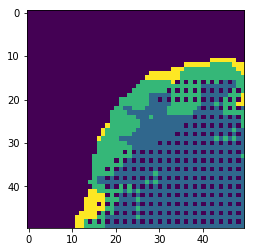

In [12]:
plt.imshow(arr_test[80,10:60,10:60])

In [2]:
sys.path.append('/nas/longleaf/home/siyangj/niftynet/extensions/network/my_nets/')

In [3]:
from unet88 import unet88
from niftynet.network.unet import UNet3D
from my_unet import my_UNet3D
from my_unet_layer_2 import my_unet_layer_2

In [9]:
var = tf.get_variable('test_var_11',[64,100,100,100,1])
var2 = tf.get_variable('test_var_22',[64,96,96,96,1])
var3 = tf.get_variable('test_var_33',[64,32,32,32,1])

In [5]:
test_layer_1 = unet88(1)
test_layer_2 = UNet3D(2)
test_layer_3 = my_UNet3D(3)
test_layer_4 = my_unet_layer_2(4)

using unet88
using UNet
using my_UNet
using my_unet_layer_2


In [6]:
test_layer_4

In [10]:
with tf.Session():
    
    #out1 = test_layer_1(var)
    #out2 = test_layer_2(var2)
    #out3 = test_layer_3(var2)
    out4 = test_layer_4(var3)
    #print(out1)
    #print(out2)
    #print(out3)
    print(out4)

[Layer] my_unet_layer_2/L1 [Trainable] 32_bn_prelu/conv_/w, 32_bn_prelu/bn_/beta, 32_bn_prelu/bn_/gamma, 32_bn_prelu/prelu_acti_/alpha, 64_bn_prelu/conv_/w, 64_bn_prelu/bn_/beta, 64_bn_prelu/bn_/gamma, 64_bn_prelu/prelu_acti_/alpha (56448)
[Layer] my_unet_layer_2/L2 [Trainable] 64_bn_prelu/conv_/w, 64_bn_prelu/bn_/beta, 64_bn_prelu/bn_/gamma, 64_bn_prelu/prelu_acti_/alpha, 128_bn_prelu/conv_/w, 128_bn_prelu/bn_/beta, 128_bn_prelu/bn_/gamma, 128_bn_prelu/prelu_acti_/alpha (332352)
[Layer] my_unet_layer_2/L4 [Trainable] 128_bn_prelu/conv_/w, 128_bn_prelu/bn_/beta, 128_bn_prelu/bn_/gamma, 128_bn_prelu/prelu_acti_/alpha, 256_bn_prelu/conv_/w, 256_bn_prelu/bn_/beta, 256_bn_prelu/bn_/gamma, 256_bn_prelu/prelu_acti_/alpha, up_2x2_bn/deconv_/w, up_2x2_bn/bn_/beta, up_2x2_bn/bn_/gamma (1853056)
[Layer] my_unet_layer_2/R2 [Trainable] 128_bn_prelu/conv_/w, 128_bn_prelu/bn_/beta, 128_bn_prelu/bn_/gamma, 128_bn_prelu/prelu_acti_/alpha, 128_bn_prelu_1/conv_/w, 128_bn_prelu_1/bn_/beta, 128_bn_prelu_1